In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Praktikum/Praktikum 04"

Mengimport Semua Library yang akan Dibutuhkan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pra-pemrosesan dan Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Metrik Evaluasi
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

print("Semua library berhasil di-import.")

Semua library berhasil di-import.


Mengimport file yang akan diuji

In [5]:
df = pd.read_csv(path + '/Data/calonpembelimobil.csv')

print("5 baris pertama dari dataset:")
display(df.head())


5 baris pertama dari dataset:


,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


Untuk Menampilkan Informasi Umum DataSet

In [6]:
print("\nInformasi umum dataset:")
df.info()


Informasi umum dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


Untuk Mengecek Nilai yang Hilang (Missing Value)

In [7]:
print("\nCek nilai yang hilang (missing values):")
print(df.isnull().sum())


Cek nilai yang hilang (missing values):
ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64


Menganalisis Korelasi antar Fitur

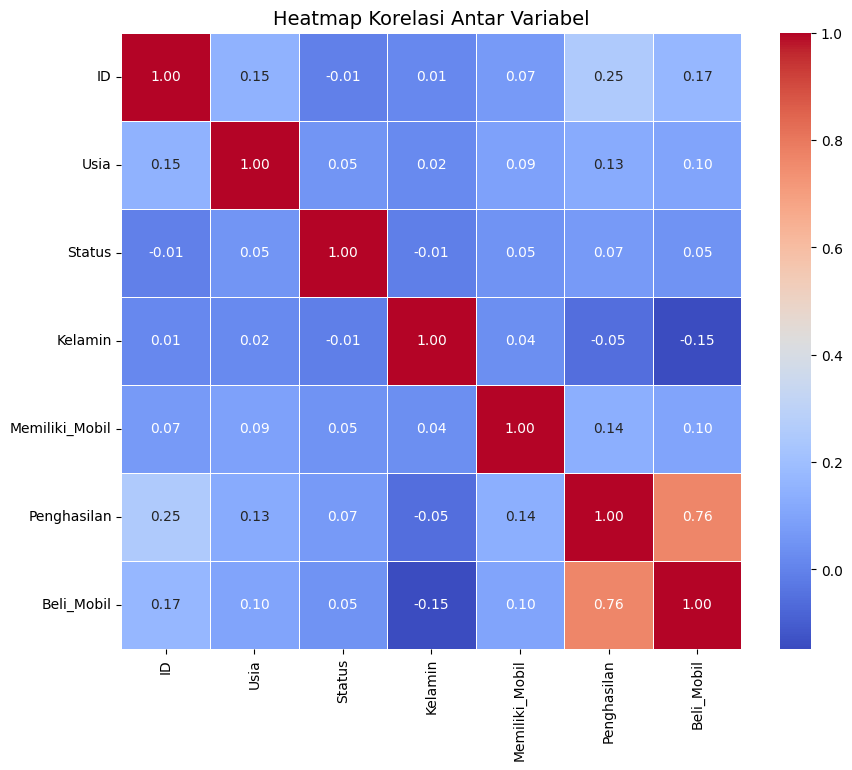

In [8]:
# Menghitung matriks korelasi
corr_matrix = df.corr(numeric_only=True)

# Membuat visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel", fontsize=14)
plt.show()

Mendefiniskan Fitur (X) dan Target (Y)

In [9]:
# X berisi semua kolom kecuali 'ID' dan 'Beli_Mobil'
X = df.drop(['ID', 'Beli_Mobil'], axis=1)

# y hanya berisi kolom target 'Beli_Mobil'
y = df['Beli_Mobil']

print("Fitur (X) yang digunakan:")
display(X.head())

print("\nTarget (y):")
display(y.head())

Fitur (X) yang digunakan:


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
0,32,1,0,0,240
1,49,2,1,1,100
2,52,1,0,2,250
3,26,2,1,1,130
4,45,3,0,2,237



Target (y):


,Beli_Mobil
0,1
1,0
2,1
3,0
4,1


Membagi DataSet (Training & Testing)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Ukuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test): {X_test.shape}")

Ukuran data latih (X_train): (800, 5)
Ukuran data uji (X_test): (200, 5)


Membuat Pra-Pemrosesan dan Model

In [11]:
# Tentukan kolom numerik yang perlu di-scaling
kolom_numerik = ['Usia', 'Penghasilan']

# Tentukan kolom lain yang hanya perlu dilewatkan (karena sudah dalam format numerik sederhana)
kolom_lainnya = ['Status', 'Kelamin', 'Memiliki_Mobil']

# Buat preprocessor dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), kolom_numerik),
        ('pass', 'passthrough', kolom_lainnya)
    ],
    remainder='drop'
)

# Buat pipeline yang menggabungkan preprocessor dan model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

print("Pipeline berhasil dibuat.")

Pipeline berhasil dibuat.


Melatih Model

In [12]:
# Latih pipeline pada data training
model_pipeline.fit(X_train, y_train)

print("Model berhasil dilatih menggunakan pipeline.")

Model berhasil dilatih menggunakan pipeline.


Evaluasi Model Secara Menyeluruh

In [13]:
# Prediksi label dan probabilitas
y_pred = model_pipeline.predict(X_test)
y_prob = model_pipeline.predict_proba(X_test)[:, 1]

# Hitung semua metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Tampilkan metrik utama
print("--- Hasil Evaluasi Model ---")
print(f"Akurasi   : {accuracy:.4f}")
print(f"Presisi   : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")




--- Hasil Evaluasi Model ---
Akurasi   : 0.9350
Presisi   : 0.9672
Recall    : 0.9291
F1-Score  : 0.9478
ROC-AUC   : 0.9772


In [14]:
# Tampilkan Classification Report
print("\n--- Laporan Klasifikasi ---")
print(classification_report(y_test, y_pred, target_names=['Tidak Beli (0)', 'Beli (1)']))


--- Laporan Klasifikasi ---
                precision    recall  f1-score   support

Tidak Beli (0)       0.88      0.95      0.91        73
      Beli (1)       0.97      0.93      0.95       127

      accuracy                           0.94       200
     macro avg       0.93      0.94      0.93       200
  weighted avg       0.94      0.94      0.94       200




--- Confusion Matrix ---


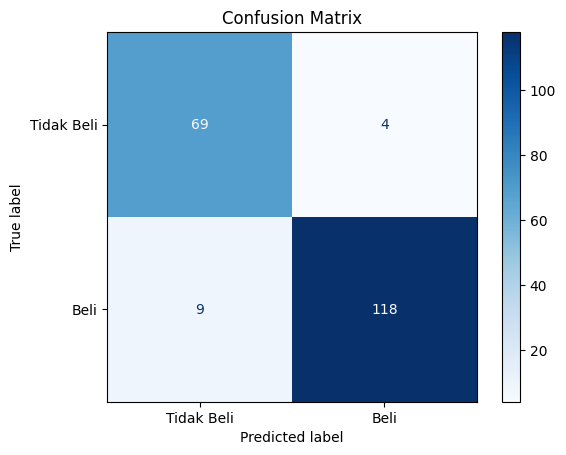

In [15]:
# Tampilkan Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Beli', 'Beli'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Interpretasi Koefisien Model

In [16]:
# Dapatkan nama fitur setelah diproses oleh ColumnTransformer
feature_names_processed = kolom_numerik + kolom_lainnya

# Dapatkan koefisien dari model di dalam pipeline
coefficients = model_pipeline.named_steps['classifier'].coef_[0]

# Buat DataFrame untuk interpretasi
coef_df = pd.DataFrame({
    'Fitur': feature_names_processed,
    'Koefisien': coefficients,
    'Odds Ratio': np.exp(coefficients)
}).sort_values('Odds Ratio', ascending=False)

print("--- Pengaruh Setiap Fitur Terhadap Keputusan Membeli Mobil ---")
display(coef_df)

--- Pengaruh Setiap Fitur Terhadap Keputusan Membeli Mobil ---


,Fitur,Koefisien,Odds Ratio
1,Penghasilan,4.746019,115.125087
4,Memiliki_Mobil,0.127131,1.135566
0,Usia,-0.083314,0.920062
2,Status,-0.141676,0.867902
3,Kelamin,-1.132213,0.322319


Prediksi Menggunakan Data Baru

In [17]:
# Buat data baru dalam format DataFrame
data_baru = pd.DataFrame({
    'Usia': [30, 55],
    'Status': [1, 3],
    'Kelamin': [0, 1],
    'Memiliki_Mobil': [0, 2],
    'Penghasilan': [260, 90]
})

print("Data baru yang akan diprediksi:")
display(data_baru)

# Lakukan prediksi menggunakan pipeline
prediksi_final = model_pipeline.predict(data_baru)
probabilitas_final = model_pipeline.predict_proba(data_baru)

# Tampilkan hasil
print("\n--- Hasil Prediksi untuk Data Baru ---")
for i, pred in enumerate(prediksi_final):
    keputusan = "Beli Mobil" if pred == 1 else "Tidak Beli Mobil"
    prob_beli = probabilitas_final[i][1] * 100

    print(f"\nData ke-{i+1}:")
    print(f" -> Prediksi: {keputusan}")
    print(f" -> Probabilitas Membeli: {prob_beli:.2f}%")

Data baru yang akan diprediksi:


,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
0,30,1,0,0,260
1,55,3,1,2,90



--- Hasil Prediksi untuk Data Baru ---

Data ke-1:
 -> Prediksi: Beli Mobil
 -> Probabilitas Membeli: 92.60%

Data ke-2:
 -> Prediksi: Tidak Beli Mobil
 -> Probabilitas Membeli: 0.07%
